In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
app_values = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

application_df[app_values].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

<AxesSubplot:ylabel='Density'>

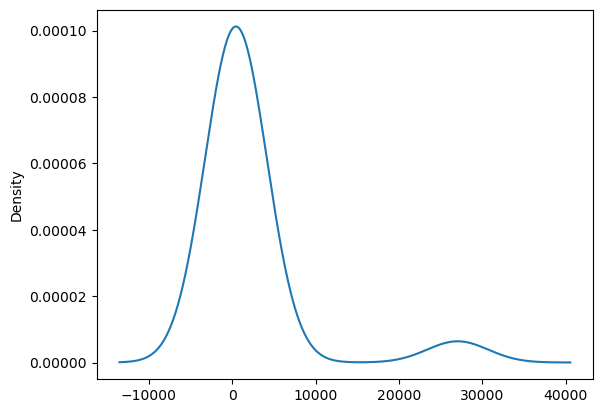

In [4]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
app_type = application_df.APPLICATION_TYPE.value_counts()


app_type.plot.density()

In [5]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(app_type[app_type < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

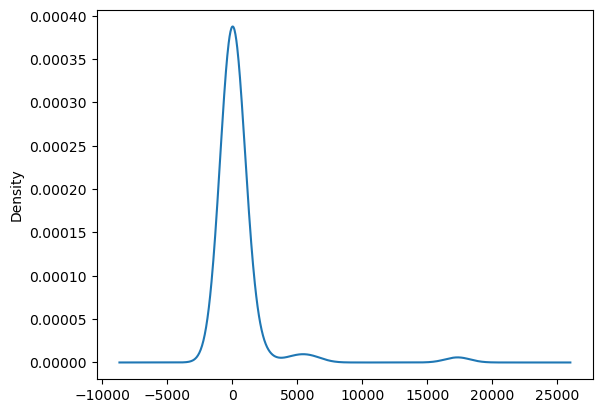

In [7]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE

class_type = application_df.CLASSIFICATION.value_counts()


class_type.plot.density()

In [8]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(class_type[class_type < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
class_type = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[class_type].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[class_type]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(class_type)
encode_df.head()

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [11]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE

merged_df = application_df.merge(encode_df, left_index=True, right_index=True)
merged_df = merged_df.drop(class_type,1)
merged_df.head()

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [12]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = merged_df['IS_SUCCESSFUL'].values
X = merged_df.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 352       
                                                                 
 dense_25 (Dense)            (None, 5)                 45        
                                                                 
 dense_26 (Dense)            (None, 3)                 18        
                                                                 
 dense_27 (Dense)            (None, 1)                 4         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_1/",exist_ok=True)
checkpoint_path = "checkpoints_1/weights.{epoch:02d}.hdf5"

In [33]:
# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [63]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:01 - loss: 0.6988 - accuracy: 0.4688
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5437  
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5219
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkp


Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy

166/804 [=====>........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5267
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5287
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.


Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5

Epoch 2: saving model to checkpoints_2\weights.02.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 2: saving model to checkpoints_2\weights.

333/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.03.hdf5

Epoch 3: saving model to checkpoints_2\weights.


Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6871 - accuracy: 0.5608
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.6881 - accuracy: 0.5530
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.6886 - accuracy: 0.5495
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.6884 - accuracy

499/804 [=================>............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.04.hdf5

Epoch 4: saving model to checkpoints_2\weights.


Epoch 5: saving model to checkpoints_2\weights.05.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5278
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.

664/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.05.hdf5

Epoch 5: saving model to checkpoints_2\weights.

335/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5302
Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.06.hdf5

Epoch 6: saving model to checkpoints_2\weights.

 16/804 [..............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6930 - accuracy: 0.5181
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5211
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5232
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.


Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5

Epoch 7: saving model to checkpoints_2\weights.07.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 7: saving model to checkpoints_2\weights.

182/804 [=====>........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.


Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5

Epoch 8: saving model to checkpoints_2\weights.08.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 8: saving model to checkpoints_2\weights.

348/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.09.hdf5

Epoch 9: saving model to checkpoints_2\weights.

 19/804 [..............................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5247
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5165
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoint

499/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoints_2\weights.10.hdf5

Epoch 10: saving model to checkpoint

170/804 [=====>........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoint

650/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoints_2\weights.11.hdf5

Epoch 11: saving model to checkpoint


Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5

Epoch 12: saving model to checkpoints_2\weights.12.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 12: saving model to checkpoint

Epoch 13/100
  1/804 [..............................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5273
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.6942 - accuracy: 0.5080
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model 

482/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5294
Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoints_2\weights.13.hdf5

Epoch 13: saving model to checkpoint

153/804 [====>.........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoint


Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5

Epoch 14: saving model to checkpoints_2\weights.14.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 14: saving model to checkpoint

304/804 [==========>...................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5413
Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5401
Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5385
Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5398
Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoint

784/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5

Epoch 15: saving model to checkpoints_2\weights.15.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 15: saving model to checkpoints_2\weights.15.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 16/100
  1/804 [..............................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5938
Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5359
Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.

455/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoints_2\weights.16.hdf5

Epoch 16: saving model to checkpoint


Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5381
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5373
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5366
Epoch 17: saving model to checkpoint


Epoch 17: saving model to checkpoints_2\weights.17.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoints_2\weights.17.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 17: saving model to checkpoints_2\weights.17.hdf5

Epoch 17: saving model to checkpoint


Epoch 18: saving model to checkpoints_2\weights.18.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoint

767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5

Epoch 18: saving model to checkpoints_2\weights.18.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 18: saving model to checkpoints_2\weights.18.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 19/100
  1/804 [..............................] - ETA: 1s - loss: 0.6838 - accuracy: 0.5938
Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.

438/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoints_2\weights.19.hdf5

Epoch 19: saving model to checkpoint

104/804 [==>...........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5262
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoint

584/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoints_2\weights.20.hdf5

Epoch 20: saving model to checkpoint

255/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5275
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5255
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5274
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoint

735/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoints_2\weights.21.hdf5

Epoch 21: saving model to checkpoint

410/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoints_2\weights.22.hdf5

Epoch 22: saving model to checkpoint

 77/804 [=>............................] - ETA: 2s - loss: 0.6888 - accuracy: 0.5495
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5452
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5418
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5387
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoint

562/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoints_2\weights.23.hdf5

Epoch 23: saving model to checkpoint


Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5414
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5400
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 24: saving model to checkpoint


Epoch 24: saving model to checkpoints_2\weights.24.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoints_2\weights.24.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 24: saving model to checkpoints_2\weights.24.hdf5

Epoch 24: saving model to checkpoint


Epoch 25: saving model to checkpoints_2\weights.25.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoints_2\weights.25.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoints_2\weights.25.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoints_2\weights.25.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 25: saving model to checkpoints_2\weights.25.hdf5

Epoch 25: saving model to checkpoint


Epoch 26: saving model to checkpoints_2\weights.26.hdf5
 65/804 [=>............................] - ETA: 2s - loss: 0.6878 - accuracy: 0.5567
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.6886 - accuracy: 0.5504
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5441
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5449
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoint

540/804 [===================>..........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5361
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoints_2\weights.26.hdf5

Epoch 26: saving model to checkpoint

211/804 [======>.......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoint

691/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoints_2\weights.27.hdf5

Epoch 27: saving model to checkpoint

362/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoints_2\weights.28.hdf5

Epoch 28: saving model to checkpoint

 33/804 [>.............................] - ETA: 2s - loss: 0.6944 - accuracy: 0.5066
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5427
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5457
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoint

513/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoints_2\weights.29.hdf5

Epoch 29: saving model to checkpoint

184/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoint

664/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoints_2\weights.30.hdf5

Epoch 30: saving model to checkpoint

335/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5246
Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5253
Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5241
Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5245
Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoints_2\weights.31.hdf5

Epoch 31: saving model to checkpoint


Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6934 - accuracy: 0.5156
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.6892 - accuracy: 0.5462
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5420
Epoch 32: saving model to checkpoint


Epoch 32: saving model to checkpoints_2\weights.32.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoints_2\weights.32.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 32: saving model to checkpoints_2\weights.32.hdf5

Epoch 32: saving model to checkpoint


Epoch 33: saving model to checkpoints_2\weights.33.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5445
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5445
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5454
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5426
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoint

647/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoints_2\weights.33.hdf5

Epoch 33: saving model to checkpoint

313/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5286
Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoint

793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 34: saving model to checkpoints_2\weights.34.hdf5

Epoch 34: saving model to checkpoints_2\weights.34.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 35/100
  1/804 [..............................] - ETA: 1s - loss: 0.6996 - accuracy: 0.4688
Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6954 - accuracy: 0.5000
Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 35: saving model to checkpoints_2\weights.


Epoch 35: saving model to checkpoints_2\weights.35.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoints_2\weights.35.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 35: saving model to checkpoints_2\weights.35.hdf5

Epoch 35: saving model to checkpoint


Epoch 36: saving model to checkpoints_2\weights.36.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5388
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoint

620/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoints_2\weights.36.hdf5

Epoch 36: saving model to checkpoint


Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 37: saving model to checkpoint


Epoch 37: saving model to checkpoints_2\weights.37.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5

Epoch 37: saving model to checkpoints_2\weights.37.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 37: saving model to checkpoints_2\weights.37.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 38/100
  1/804 [..............................] - ETA: 0s - loss: 0.6833 - accuracy: 0.5938
Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5
 17/804 [..............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5460
Epoch 38: saving model to checkpoints_2\weights.


Epoch 38: saving model to checkpoints_2\weights.38.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoints_2\weights.38.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 38: saving model to checkpoints_2\weights.38.hdf5

Epoch 38: saving model to checkpoint


Epoch 39: saving model to checkpoints_2\weights.39.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5445
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5430
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5427
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5437
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoint


Epoch 39: saving model to checkpoints_2\weights.39.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5318
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoints_2\weights.39.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 39: saving model to checkpoints_2\weights.39.hdf5

Epoch 39: saving model to checkpoint


Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 40: saving model to checkpoint


Epoch 40: saving model to checkpoints_2\weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 40: saving model to checkpoints_2\weights.40.hdf5

Epoch 40: saving model to checkpoints_2\weights.40.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 41/100
  1/804 [..............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 41: saving model to checkpoints_2\weights.


Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5

Epoch 41: saving model to checkpoints_2\weights.41.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 41: saving model to checkpoint

108/804 [===>..........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5302
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoint

587/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoints_2\weights.42.hdf5

Epoch 42: saving model to checkpoint

258/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoint

738/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoints_2\weights.43.hdf5

Epoch 43: saving model to checkpoint


Epoch 44: saving model to checkpoints_2\weights.44.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoints_2\weights.44.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoints_2\weights.44.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoints_2\weights.44.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 44: saving model to checkpoints_2\weights.44.hdf5

Epoch 44: saving model to checkpoint

 79/804 [=>............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoint

560/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoints_2\weights.45.hdf5

Epoch 45: saving model to checkpoint

231/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoint

710/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoints_2\weights.46.hdf5

Epoch 46: saving model to checkpoint


Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5399
Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6902 - accuracy: 0.5390
Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6901 - accuracy: 0.5400
Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5

Epoch 47: saving model to checkpoints_2\weights.47.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.6900 - accuracy: 0.5402
Epoch 47: saving model to checkpoint


Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5398
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5397
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 48: saving model to checkpoint


Epoch 48: saving model to checkpoints_2\weights.48.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoints_2\weights.48.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 48: saving model to checkpoints_2\weights.48.hdf5

Epoch 48: saving model to checkpoint


Epoch 49: saving model to checkpoints_2\weights.49.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoint

693/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoints_2\weights.49.hdf5

Epoch 49: saving model to checkpoint

364/804 [============>.................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5385
Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5379
Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoints_2\weights.50.hdf5

Epoch 50: saving model to checkpoint

 30/804 [>.............................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5240
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5359
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5367
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoint


Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5

Epoch 51: saving model to checkpoints_2\weights.51.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 51: saving model to checkpoint

181/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoint

661/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoints_2\weights.52.hdf5

Epoch 52: saving model to checkpoint


Epoch 53: saving model to checkpoints_2\weights.53.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5405
Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoints_2\weights.53.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6900 - accuracy: 0.5400
Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoints_2\weights.53.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5388
Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoints_2\weights.53.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5389
Epoch 53: saving model to checkpoints_2\weights.53.hdf5

Epoch 53: saving model to checkpoint


Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6877 - accuracy: 0.5590
Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5384
Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.691


Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5

Epoch 54: saving model to checkpoints_2\weights.54.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 54: saving model to checkpoint

159/804 [====>.........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoint

639/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoints_2\weights.55.hdf5

Epoch 55: saving model to checkpoint


Epoch 56: saving model to checkpoints_2\weights.56.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoints_2\weights.56.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoints_2\weights.56.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoints_2\weights.56.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 56: saving model to checkpoints_2\weights.56.hdf5

Epoch 56: saving model to checkpoint

795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 56: saving model to checkpoints_2\weights.56.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 57/100

Epoch 57: saving model to checkpoints_2\weights.57.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.7000 - accuracy: 0.4688
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6961 - accuracy: 0.4961
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6937 - accuracy: 0.5131
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.

467/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoints_2\weights.57.hdf5

Epoch 57: saving model to checkpoint

137/804 [====>.........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5249
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5251
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5268
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5265
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoint

617/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoints_2\weights.58.hdf5

Epoch 58: saving model to checkpoint

283/804 [=========>....................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5375
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5368
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5374
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5371
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoint

763/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 59: saving model to checkpoints_2\weights.59.hdf5

Epoch 59: saving model to checkpoints_2\weights.59.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 60/100
  1/804 [..............................] - ETA: 1s - loss: 0.6800 - accuracy: 0.6250
Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.


Epoch 60: saving model to checkpoints_2\weights.60.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.60.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.60.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoints_2\weights.60.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 60: saving model to checkpoints_2\weights.60.hdf5

Epoch 60: saving model to checkpoint


Epoch 61: saving model to checkpoints_2\weights.61.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5265
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5266
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoint

590/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoints_2\weights.61.hdf5

Epoch 61: saving model to checkpoint


Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 62: saving model to checkpoint


Epoch 62: saving model to checkpoints_2\weights.62.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5

Epoch 62: saving model to checkpoints_2\weights.62.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 62: saving model to checkpoints_2\weights.62.hdf5
804/804 [============================


Epoch 63: saving model to checkpoints_2\weights.63.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5261
Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoints_2\weights.63.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5271
Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoints_2\weights.63.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoints_2\weights.63.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5270
Epoch 63: saving model to checkpoints_2\weights.63.hdf5

Epoch 63: saving model to checkpoint


Epoch 64: saving model to checkpoints_2\weights.64.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5218
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5252
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5282
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoint

573/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5284
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5287
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5281
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5285
Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoints_2\weights.64.hdf5

Epoch 64: saving model to checkpoint

244/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoint

724/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoints_2\weights.65.hdf5

Epoch 65: saving model to checkpoint

395/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoints_2\weights.66.hdf5

Epoch 66: saving model to checkpoint


Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5263
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5227
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5268
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5271
Epoch 67: saving model to checkpoint


Epoch 67: saving model to checkpoints_2\weights.67.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoints_2\weights.67.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 67: saving model to checkpoints_2\weights.67.hdf5

Epoch 67: saving model to checkpoint


Epoch 68: saving model to checkpoints_2\weights.68.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5226
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5251
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5263
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5269
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoint

708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoints_2\weights.68.hdf5

Epoch 68: saving model to checkpoint

378/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoints_2\weights.69.hdf5

Epoch 69: saving model to checkpoint

 49/804 [>.............................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5434
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5359
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoint

529/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoints_2\weights.70.hdf5

Epoch 70: saving model to checkpoint

200/804 [======>.......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5409
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoint

680/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoints_2\weights.71.hdf5

Epoch 71: saving model to checkpoint


Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5

Epoch 72: saving model to checkpoints_2\weights.72.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5356
Epoch 72: saving model to checkpoint


Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5423
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5432
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5363
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 73: saving model to checkpoint


Epoch 73: saving model to checkpoints_2\weights.73.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoints_2\weights.73.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5303
Epoch 73: saving model to checkpoints_2\weights.73.hdf5

Epoch 73: saving model to checkpoint

178/804 [=====>........................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5261
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoint

658/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoints_2\weights.74.hdf5

Epoch 74: saving model to checkpoint

329/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5290
Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoints_2\weights.75.hdf5

Epoch 75: saving model to checkpoint

  1/804 [..............................] - ETA: 1s - loss: 0.7120 - accuracy: 0.3750
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5259
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5256
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoint

485/804 [=================>............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5363
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5361
Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoints_2\weights.76.hdf5

Epoch 76: saving model to checkpoint


Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5245
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5269
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5270
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5282
Epoch 77: saving model to checkpoint


Epoch 77: saving model to checkpoints_2\weights.77.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 77: saving model to checkpoints_2\weights.77.hdf5

Epoch 77: saving model to checkpoints_2\weights.77.hdf5
697/804 [=========================>..


Epoch 78: saving model to checkpoints_2\weights.78.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoints_2\weights.78.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoints_2\weights.78.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoints_2\weights.78.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 78: saving model to checkpoints_2\weights.78.hdf5

Epoch 78: saving model to checkpoint

798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 78: saving model to checkpoints_2\weights.78.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 79/100
  1/804 [..............................] - ETA: 1s - loss: 0.6791 - accuracy: 0.6250
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6950 - accuracy: 0.5018
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.

468/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoints_2\weights.79.hdf5

Epoch 79: saving model to checkpoint

135/804 [====>.........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5428
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5447
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6897 - accuracy: 0.5422
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5417
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoint

614/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoints_2\weights.80.hdf5

Epoch 80: saving model to checkpoint


Epoch 81: saving model to checkpoints_2\weights.81.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5252
Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5261
Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5249
Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5257
Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoint

770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5

Epoch 81: saving model to checkpoints_2\weights.81.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 82/100

Epoch 82: saving model to checkpoints_2\weights.82.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.7002 - accuracy: 0.4688
Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6970 - accuracy


Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5

Epoch 82: saving model to checkpoints_2\weights.82.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 82: saving model to checkpoint


Epoch 83: saving model to checkpoints_2\weights.83.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5281
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoint

599/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoints_2\weights.83.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 83: saving model to checkpoints_2\weights.83.hdf5

Epoch 83: saving model to checkpoint


Epoch 84: saving model to checkpoints_2\weights.84.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoint


Epoch 84: saving model to checkpoints_2\weights.84.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5

Epoch 84: saving model to checkpoints_2\weights.84.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 84: saving model to checkpoints_2\weights.84.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 85/100
  1/804 [..............................] - ETA: 0s - loss: 0.6871 - accuracy: 0.5625
Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.


Epoch 85: saving model to checkpoints_2\weights.85.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.85.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.85.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoints_2\weights.85.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 85: saving model to checkpoints_2\weights.85.hdf5

Epoch 85: saving model to checkpoint

127/804 [===>..........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5246
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoint


Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5

Epoch 86: saving model to checkpoints_2\weights.86.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 86: saving model to checkpoint

292/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoint


Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5

Epoch 87: saving model to checkpoints_2\weights.87.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 88/100
  1/804 [..............................] - ETA: 1s - loss: 0.6693 - accuracy: 0.6875
Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6960 - accuracy: 0.4963
Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving m


Epoch 88: saving model to checkpoints_2\weights.88.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoints_2\weights.88.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 88: saving model to checkpoints_2\weights.88.hdf5

Epoch 88: saving model to checkpoint


Epoch 89: saving model to checkpoints_2\weights.89.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.6885 - accuracy: 0.5504
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.6887 - accuracy: 0.5490
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.6884 - accuracy: 0.5506
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.6885 - accuracy: 0.5501
Epoch 89: saving model to checkpoint

628/804 [======================>.......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5376
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5373
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5365
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoints_2\weights.89.hdf5

Epoch 89: saving model to checkpoint


Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5

Epoch 90: saving model to checkpoints_2\weights.90.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 90: saving model to checkpoint

804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 91/100
  1/804 [..............................] - ETA: 0s - loss: 0.7077 - accuracy: 0.4062
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6932 - accuracy: 0.5156
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.6923 - accuracy


Epoch 91: saving model to checkpoints_2\weights.91.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoints_2\weights.91.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 91: saving model to checkpoints_2\weights.91.hdf5

Epoch 91: saving model to checkpoint


Epoch 92: saving model to checkpoints_2\weights.92.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5270
Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 92: saving model to checkpoint


Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5

Epoch 92: saving model to checkpoints_2\weights.92.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.691


Epoch 93: saving model to checkpoints_2\weights.93.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoints_2\weights.93.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoints_2\weights.93.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoints_2\weights.93.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 93: saving model to checkpoints_2\weights.93.hdf5

Epoch 93: saving model to checkpoint

 18/804 [..............................] - ETA: 2s - loss: 0.6950 - accuracy: 0.5035
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.6933 - accuracy: 0.5161
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.6927 - accuracy: 0.5204
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5223
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoint

500/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5288
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5291
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoints_2\weights.94.hdf5

Epoch 94: saving model to checkpoint

170/804 [=====>........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5270
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5280
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5256
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5269
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoint

649/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoints_2\weights.95.hdf5

Epoch 95: saving model to checkpoint

320/804 [==========>...................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353
Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoints_2\weights.96.hdf5

Epoch 96: saving model to checkpoint

804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 97/100

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6749 - accuracy: 0.6562
Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.6866 - accuracy: 0.5664
Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.6877 - accuracy: 0.5575
Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.6892 - accuracy


Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5

Epoch 97: saving model to checkpoints_2\weights.97.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 97: saving model to checkpoint


Epoch 98: saving model to checkpoints_2\weights.98.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5310
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoint

627/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoints_2\weights.98.hdf5

Epoch 98: saving model to checkpoint

298/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoint

778/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 99: saving model to checkpoints_2\weights.99.hdf5

Epoch 99: saving model to checkpoints_2\weights.99.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 100/100
  1/804 [..............................] - ETA: 0s - loss: 0.6992 - accuracy: 0.4688
Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6957 - accuracy: 0.4951
Epoch 100: saving model to checkpoints_

439/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: saving model to checkpoints_2\weights.100.hdf5

Epoch 100: sav

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6896 - accuracy: 0.5324 - 225ms/epoch - 839us/step
Loss: 0.6896265149116516, Accuracy: 0.5323615074157715


In [37]:
#this attempt was unsuccessful will attempt again with more layers

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# these hidden layers will follow the 
number_input_features = len(X_train[0])
hidden_nodes_layer4 = 25
hidden_nodes_layer5 = 20
hidden_nodes_layer6 = 15
hidden_nodes_layer7 = 10

nn2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer4, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# fourth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 25)                1100      
                                                                 
 dense_37 (Dense)            (None, 20)                520       
                                                                 
 dense_38 (Dense)            (None, 15)                315       
                                                                 
 dense_39 (Dense)            (None, 10)                160       
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,106
Trainable params: 2,106
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the model
#  YOUR CODE GOES HERE
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_2/",exist_ok=True)
checkpoint_path = "checkpoints_2/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [61]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn2.fit(X_train,y_train,epochs=150,callbacks=[cp_callback])

Epoch 1/150
  1/804 [..............................] - ETA: 9:24 - loss: 0.6742 - accuracy: 0.6562
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5458  
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5248
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5437
Epoch 1: saving model to checkpoints_2\weights.01.hdf5

Epoch 1: saving model to checkpoints_2\weights.01.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6888 - accuracy: 0.5493
Epo

OSError: Unable to create file (unable to open file: name = 'checkpoints_2\weights.01.hdf5', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer8 = 30
hidden_nodes_layer9 = 25
hidden_nodes_layer10 = 20


nn3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer8, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer9, activation="relu"))

# third hidden layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer10, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 30)                1320      
                                                                 
 dense_42 (Dense)            (None, 25)                775       
                                                                 
 dense_43 (Dense)            (None, 20)                520       
                                                                 
 dense_44 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,636
Trainable params: 2,636
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
#  YOUR CODE GOES HERE
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_3/",exist_ok=True)
checkpoint_path = "checkpoints_3/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [57]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/200
  1/804 [..............................] - ETA: 6:15 - loss: 0.4651 - accuracy: 0.8125
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5240 - accuracy: 0.7542  
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7385
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5210 - accuracy: 0.7486
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkp


Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7398
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5322 - accuracy: 0.7421
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5318 - accuracy: 0.7423
Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5

Epoch 1: saving model to checkpoints_3\weights.01.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7420
Epoch 1: saving model to checkpoints_3\weights.

166/804 [=====>........................] - ETA: 2s - loss: 0.5293 - accuracy: 0.7430
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7391
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7364
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7355
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.


Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5304 - accuracy: 0.7431
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7424
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7425
Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5

Epoch 2: saving model to checkpoints_3\weights.02.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7419
Epoch 2: saving model to checkpoints_3\weights.

327/804 [===========>..................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7434
Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7438
Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5312 - accuracy: 0.7427
Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7428
Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.03.hdf5

Epoch 3: saving model to checkpoints_3\weights.

  1/804 [..............................] - ETA: 1s - loss: 0.5880 - accuracy: 0.7500
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.4995 - accuracy: 0.7812
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5260 - accuracy: 0.7500
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7420
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.


Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5308 - accuracy: 0.7432
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5301 - accuracy: 0.7442
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5304 - accuracy: 0.7438
Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5

Epoch 4: saving model to checkpoints_3\weights.04.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5304 - accuracy: 0.7440
Epoch 4: saving model to checkpoints_3\weights.

164/804 [=====>........................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7300
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7322
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7324
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7322
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.


Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5311 - accuracy: 0.7428
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7424
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7423
Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5

Epoch 5: saving model to checkpoints_3\weights.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5322 - accuracy: 0.7411
Epoch 5: saving model to checkpoints_3\weights.

330/804 [===========>..................] - ETA: 1s - loss: 0.5262 - accuracy: 0.7470
Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7477
Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5253 - accuracy: 0.7477
Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5255 - accuracy: 0.7467
Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.06.hdf5

Epoch 6: saving model to checkpoints_3\weights.

  1/804 [..............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5625
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5131 - accuracy: 0.7578
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5278 - accuracy: 0.7429
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7432
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.


Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7457
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5283 - accuracy: 0.7458
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5274 - accuracy: 0.7461
Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5

Epoch 7: saving model to checkpoints_3\weights.07.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5268 - accuracy: 0.7464
Epoch 7: saving model to checkpoints_3\weights.

167/804 [=====>........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7390
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7375
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7395
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7409
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.


Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7427
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5312 - accuracy: 0.7427
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7425
Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5

Epoch 8: saving model to checkpoints_3\weights.08.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7424
Epoch 8: saving model to checkpoints_3\weights.

323/804 [===========>..................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7442
Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7449
Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7450
Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7450
Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.09.hdf5

Epoch 9: saving model to checkpoints_3\weights.

  1/804 [..............................] - ETA: 1s - loss: 0.5841 - accuracy: 0.7188
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7292
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5232 - accuracy: 0.7478
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7429
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoint

479/804 [================>.............] - ETA: 1s - loss: 0.5282 - accuracy: 0.7442
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7442
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7445
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5288 - accuracy: 0.7440
Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoints_3\weights.10.hdf5

Epoch 10: saving model to checkpoint

150/804 [====>.........................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7433
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7434
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5256 - accuracy: 0.7432
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5267 - accuracy: 0.7418
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoint

630/804 [======================>.......] - ETA: 0s - loss: 0.5288 - accuracy: 0.7440
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5283 - accuracy: 0.7444
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5289 - accuracy: 0.7439
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7433
Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoints_3\weights.11.hdf5

Epoch 11: saving model to checkpoint

301/804 [==========>...................] - ETA: 1s - loss: 0.5243 - accuracy: 0.7481
Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5227 - accuracy: 0.7486
Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5229 - accuracy: 0.7487
Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5253 - accuracy: 0.7467
Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoint

781/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7427
Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5

Epoch 12: saving model to checkpoints_3\weights.12.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7424
Epoch 12: saving model to checkpoints_3\weights.12.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5312 - accuracy: 0.7421
Epoch 13/200
  1/804 [..............................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7500
Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7441
Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.

447/804 [===============>..............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7417
Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7413
Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5325 - accuracy: 0.7408
Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5324 - accuracy: 0.7405
Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoints_3\weights.13.hdf5

Epoch 13: saving model to checkpoint

118/804 [===>..........................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7415
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7415
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7405
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7408
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoint

598/804 [=====================>........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7432
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7435
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5307 - accuracy: 0.7436
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5309 - accuracy: 0.7437
Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoints_3\weights.14.hdf5

Epoch 14: saving model to checkpoint

269/804 [=========>....................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7428
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7419
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7456
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7451
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoint

749/804 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7412
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5311 - accuracy: 0.7418
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7417
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7421
Epoch 15: saving model to checkpoints_3\weights.15.hdf5

Epoch 15: saving model to checkpoints_3\weights.15.hdf5
804/804 [============================

420/804 [==============>...............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7389
Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7395
Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7393
Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5326 - accuracy: 0.7405
Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoints_3\weights.16.hdf5

Epoch 16: saving model to checkpoint

 91/804 [==>...........................] - ETA: 2s - loss: 0.5256 - accuracy: 0.7510
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7485
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7482
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5293 - accuracy: 0.7466
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoint

571/804 [====================>.........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7411
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7415
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7424
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7421
Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoints_3\weights.17.hdf5

Epoch 17: saving model to checkpoint

237/804 [=======>......................] - ETA: 2s - loss: 0.5172 - accuracy: 0.7511
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5171 - accuracy: 0.7512
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5184 - accuracy: 0.7496
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5183 - accuracy: 0.7498
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoint

717/804 [=========================>....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7432
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7427
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5306 - accuracy: 0.7425
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5306 - accuracy: 0.7422
Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoints_3\weights.18.hdf5

Epoch 18: saving model to checkpoint

388/804 [=============>................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7446
Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5289 - accuracy: 0.7441
Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7438
Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5296 - accuracy: 0.7442
Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoints_3\weights.19.hdf5

Epoch 19: saving model to checkpoint

 59/804 [=>............................] - ETA: 2s - loss: 0.5668 - accuracy: 0.7161
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7204
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7240
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5526 - accuracy: 0.7251
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoint

539/804 [===================>..........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7451
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7446
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5298 - accuracy: 0.7438
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7440
Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoints_3\weights.20.hdf5

Epoch 20: saving model to checkpoint

210/804 [======>.......................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7350
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7382
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7372
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7346
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoint

690/804 [========================>.....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7438
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7436
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7435
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5299 - accuracy: 0.7438
Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoints_3\weights.21.hdf5

Epoch 21: saving model to checkpoint

361/804 [============>.................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7419
Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7423
Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7422
Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7428
Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoints_3\weights.22.hdf5

Epoch 22: saving model to checkpoint

 27/804 [>.............................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7315
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7418
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7451
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7491
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoint

507/804 [=================>............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7435
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5285 - accuracy: 0.7435
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5284 - accuracy: 0.7440
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5278 - accuracy: 0.7443
Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoints_3\weights.23.hdf5

Epoch 23: saving model to checkpoint

178/804 [=====>........................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7389
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7379
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7399
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7403
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoint

658/804 [=======================>......] - ETA: 0s - loss: 0.5288 - accuracy: 0.7441
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5282 - accuracy: 0.7447
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5284 - accuracy: 0.7443
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7436
Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoints_3\weights.24.hdf5

Epoch 24: saving model to checkpoint

329/804 [===========>..................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7437
Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7428
Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7425
Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7420
Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoints_3\weights.25.hdf5

Epoch 25: saving model to checkpoint

  1/804 [..............................] - ETA: 1s - loss: 0.4512 - accuracy: 0.7500
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7250
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7286
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.5522 - accuracy: 0.7219
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoint

485/804 [=================>............] - ETA: 1s - loss: 0.5268 - accuracy: 0.7453
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5269 - accuracy: 0.7448
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5270 - accuracy: 0.7448
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5275 - accuracy: 0.7448
Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoints_3\weights.26.hdf5

Epoch 26: saving model to checkpoint


Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5181 - accuracy: 0.7506
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5193 - accuracy: 0.7495
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7471
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5230 - accuracy: 0.7466
Epoch 27: saving model to checkpoint


Epoch 27: saving model to checkpoints_3\weights.27.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7412
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7411
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7409
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoints_3\weights.27.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5306 - accuracy: 0.7413
Epoch 27: saving model to checkpoints_3\weights.27.hdf5

Epoch 27: saving model to checkpoint

307/804 [==========>...................] - ETA: 1s - loss: 0.5266 - accuracy: 0.7440
Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5278 - accuracy: 0.7436
Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7430
Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7422
Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoint

787/804 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.7422
Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5

Epoch 28: saving model to checkpoints_3\weights.28.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5308 - accuracy: 0.7423
Epoch 29/200
  1/804 [..............................] - ETA: 0s - loss: 0.5707 - accuracy: 0.6875
Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5140 - accuracy: 0.7610
Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5225 - accuracy: 0.7521
Epoch 29: saving model to checkpoints_3\weights.


Epoch 29: saving model to checkpoints_3\weights.29.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7395
Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7389
Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5335 - accuracy: 0.7394
Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoints_3\weights.29.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7387
Epoch 29: saving model to checkpoints_3\weights.29.hdf5

Epoch 29: saving model to checkpoint


Epoch 30: saving model to checkpoints_3\weights.30.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7397
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7404
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7414
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7425
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoint

614/804 [=====================>........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7419
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7421
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5311 - accuracy: 0.7422
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5314 - accuracy: 0.7416
Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoints_3\weights.30.hdf5

Epoch 30: saving model to checkpoint

285/804 [=========>....................] - ETA: 1s - loss: 0.5257 - accuracy: 0.7413
Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7425
Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5270 - accuracy: 0.7414
Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7389
Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoint


Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5314 - accuracy: 0.7416
Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7420
Epoch 31: saving model to checkpoints_3\weights.31.hdf5

Epoch 31: saving model to checkpoints_3\weights.31.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5311 - accuracy: 0.7422
Epoch 32/200

Epoch 32: saving model to checkpoints_3\weights.32.hdf5
  1/804 [..............................] - ETA: 6s - loss: 0.5017 - accuracy: 0.7188
Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5
 16/804 [..........

436/804 [===============>..............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7433
Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7425
Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5302 - accuracy: 0.7420
Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7422
Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoints_3\weights.32.hdf5

Epoch 32: saving model to checkpoint

107/804 [==>...........................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7392
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7413
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7395
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7395
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoint

587/804 [====================>.........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7424
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7425
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5304 - accuracy: 0.7421
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7419
Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoints_3\weights.33.hdf5

Epoch 33: saving model to checkpoint

253/804 [========>.....................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7512
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7514
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7499
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7486
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoint


Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5309 - accuracy: 0.7433
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7430
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7428
Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5

Epoch 34: saving model to checkpoints_3\weights.34.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5312 - accuracy: 0.7426
Epoch 34: saving model to checkpoint

404/804 [==============>...............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7454
Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7458
Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5289 - accuracy: 0.7447
Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5296 - accuracy: 0.7448
Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoints_3\weights.35.hdf5

Epoch 35: saving model to checkpoint

 75/804 [=>............................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7437
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5214 - accuracy: 0.7472
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5161 - accuracy: 0.7512
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5232 - accuracy: 0.7440
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoint


Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7414
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7411
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7412
Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5

Epoch 36: saving model to checkpoints_3\weights.36.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7409
Epoch 36: saving model to checkpoint

226/804 [=======>......................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7435
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7429
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7423
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7420
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoint

706/804 [=========================>....] - ETA: 0s - loss: 0.5327 - accuracy: 0.7409
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7410
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5323 - accuracy: 0.7414
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7416
Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoints_3\weights.37.hdf5

Epoch 37: saving model to checkpoint

377/804 [=============>................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7430
Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5278 - accuracy: 0.7432
Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5274 - accuracy: 0.7428
Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5269 - accuracy: 0.7433
Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoints_3\weights.38.hdf5

Epoch 38: saving model to checkpoint

 43/804 [>.............................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7347
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7328
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7389
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7369
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoint

523/804 [==================>...........] - ETA: 1s - loss: 0.5298 - accuracy: 0.7431
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7429
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7427
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7426
Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoints_3\weights.39.hdf5

Epoch 39: saving model to checkpoint


Epoch 40: saving model to checkpoints_3\weights.40.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7453
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5253 - accuracy: 0.7452
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7433
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.5284 - accuracy: 0.7423
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoint

674/804 [========================>.....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7442
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7443
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7441
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7439
Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoints_3\weights.40.hdf5

Epoch 40: saving model to checkpoint

345/804 [===========>..................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7453
Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7455
Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7454
Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5266 - accuracy: 0.7467
Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoints_3\weights.41.hdf5

Epoch 41: saving model to checkpoint

 16/804 [..............................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7480
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7359
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.5261 - accuracy: 0.7405
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.5305 - accuracy: 0.7382
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoint

496/804 [=================>............] - ETA: 1s - loss: 0.5334 - accuracy: 0.7394
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5335 - accuracy: 0.7399
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5327 - accuracy: 0.7410
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5337 - accuracy: 0.7398
Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoints_3\weights.42.hdf5

Epoch 42: saving model to checkpoint

162/804 [=====>........................] - ETA: 2s - loss: 0.5173 - accuracy: 0.7548
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7528
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7508
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.5222 - accuracy: 0.7506
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoint

642/804 [======================>.......] - ETA: 0s - loss: 0.5300 - accuracy: 0.7432
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5296 - accuracy: 0.7434
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5294 - accuracy: 0.7430
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7423
Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoints_3\weights.43.hdf5

Epoch 43: saving model to checkpoint

313/804 [==========>...................] - ETA: 1s - loss: 0.5296 - accuracy: 0.7431
Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5300 - accuracy: 0.7426
Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7407
Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5312 - accuracy: 0.7415
Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoint


Epoch 44: saving model to checkpoints_3\weights.44.hdf5

Epoch 44: saving model to checkpoints_3\weights.44.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5306 - accuracy: 0.7424
Epoch 45/200
  1/804 [..............................] - ETA: 1s - loss: 0.4753 - accuracy: 0.8125
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5080 - accuracy: 0.7730
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5218 - accuracy: 0.7518
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving m

469/804 [================>.............] - ETA: 1s - loss: 0.5301 - accuracy: 0.7442
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7429
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7427
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5311 - accuracy: 0.7430
Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoints_3\weights.45.hdf5

Epoch 45: saving model to checkpoint

135/804 [====>.........................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7299
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7315
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7352
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7354
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoint

615/804 [=====================>........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7409
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5323 - accuracy: 0.7408
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5324 - accuracy: 0.7410
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7413
Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoints_3\weights.46.hdf5

Epoch 46: saving model to checkpoint

286/804 [=========>....................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7382
Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7395
Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7389
Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7393
Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoint


Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7408
Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7422
Epoch 47: saving model to checkpoints_3\weights.47.hdf5

Epoch 47: saving model to checkpoints_3\weights.47.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5315 - accuracy: 0.7420
Epoch 48/200
  1/804 [..............................] - ETA: 0s - loss: 0.5080 - accuracy: 0.6875
Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.4726 - accuracy


Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5311 - accuracy: 0.7427
Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5306 - accuracy: 0.7431
Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5301 - accuracy: 0.7441
Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5

Epoch 48: saving model to checkpoints_3\weights.48.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7447
Epoch 48: saving model to checkpoint

108/804 [===>..........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7373
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7378
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5
138/804 [====>.........................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7389
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7390
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoint

588/804 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7419
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7424
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7425
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7420
Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoints_3\weights.49.hdf5

Epoch 49: saving model to checkpoint

259/804 [========>.....................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7377
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7396
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7404
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7405
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoint

739/804 [==========================>...] - ETA: 0s - loss: 0.5315 - accuracy: 0.7421
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5314 - accuracy: 0.7423
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7420
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7425
Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoints_3\weights.50.hdf5

Epoch 50: saving model to checkpoint

405/804 [==============>...............] - ETA: 1s - loss: 0.5262 - accuracy: 0.7470
Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5257 - accuracy: 0.7472
Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5264 - accuracy: 0.7472
Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7467
Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoints_3\weights.51.hdf5

Epoch 51: saving model to checkpoint

 76/804 [=>............................] - ETA: 2s - loss: 0.5260 - accuracy: 0.7492
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7414
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7385
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7410
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoint

556/804 [===================>..........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7430
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5302 - accuracy: 0.7428
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7432
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7436
Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoints_3\weights.52.hdf5

Epoch 52: saving model to checkpoint

222/804 [=======>......................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7421
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.5309 - accuracy: 0.7404
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7401
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5300 - accuracy: 0.7404
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoint

702/804 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7412
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7415
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.7418
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7418
Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoints_3\weights.53.hdf5

Epoch 53: saving model to checkpoint

373/804 [============>.................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7419
Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7419
Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5334 - accuracy: 0.7422
Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7420
Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoints_3\weights.54.hdf5

Epoch 54: saving model to checkpoint

 44/804 [>.............................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7408
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7436
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5258 - accuracy: 0.7445
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5210 - accuracy: 0.7472
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoint

524/804 [==================>...........] - ETA: 1s - loss: 0.5300 - accuracy: 0.7420
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7417
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7407
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5325 - accuracy: 0.7404
Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoints_3\weights.55.hdf5

Epoch 55: saving model to checkpoint

195/804 [======>.......................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7375
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7375
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7394
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7405
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoint

675/804 [========================>.....] - ETA: 0s - loss: 0.5286 - accuracy: 0.7425
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7425
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7422
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5297 - accuracy: 0.7423
Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoints_3\weights.56.hdf5

Epoch 56: saving model to checkpoint

346/804 [===========>..................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7393
Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7409
Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7397
Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7395
Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoints_3\weights.57.hdf5

Epoch 57: saving model to checkpoint

 17/804 [..............................] - ETA: 3s - loss: 0.5511 - accuracy: 0.7316
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7422
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7487
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.5250 - accuracy: 0.7530
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoint

497/804 [=================>............] - ETA: 1s - loss: 0.5326 - accuracy: 0.7410
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5327 - accuracy: 0.7411
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.5331 - accuracy: 0.7409
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7414
Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoints_3\weights.58.hdf5

Epoch 58: saving model to checkpoint

168/804 [=====>........................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7457
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.5271 - accuracy: 0.7432
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7412
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7405
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoint

648/804 [=======================>......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7401
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7406
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5306 - accuracy: 0.7413
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7410
Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoints_3\weights.59.hdf5

Epoch 59: saving model to checkpoint

319/804 [==========>...................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7373
Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7376
Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7395
Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7395
Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoints_3\weights.60.hdf5

Epoch 60: saving model to checkpoint

799/804 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.7429
Epoch 60: saving model to checkpoints_3\weights.60.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5305 - accuracy: 0.7430
Epoch 61/200
  1/804 [..............................] - ETA: 1s - loss: 0.4949 - accuracy: 0.7500
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5086 - accuracy: 0.7569
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5139 - accuracy: 0.7500
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.

465/804 [================>.............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7415
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7406
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7408
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5315 - accuracy: 0.7406
Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoints_3\weights.61.hdf5

Epoch 61: saving model to checkpoint

136/804 [====>.........................] - ETA: 2s - loss: 0.5280 - accuracy: 0.7468
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7465
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7466
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5248 - accuracy: 0.7462
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoint

616/804 [=====================>........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7441
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5302 - accuracy: 0.7442
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7432
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5306 - accuracy: 0.7431
Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoints_3\weights.62.hdf5

Epoch 62: saving model to checkpoint

287/804 [=========>....................] - ETA: 1s - loss: 0.5198 - accuracy: 0.7489
Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.5215 - accuracy: 0.7489
Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5216 - accuracy: 0.7482
Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5210 - accuracy: 0.7493
Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoint

767/804 [===========================>..] - ETA: 0s - loss: 0.5302 - accuracy: 0.7421
Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7420
Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5

Epoch 63: saving model to checkpoints_3\weights.63.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7417
Epoch 63: saving model to checkpoints_3\weights.63.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5307 - accuracy: 0.7416
Epoch 64/200
  1/804 [..............................] - ETA: 0s - loss: 0.4632 - accuracy: 0.7812
Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.

433/804 [===============>..............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7409
Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7401
Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7386
Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5347 - accuracy: 0.7387
Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoints_3\weights.64.hdf5

Epoch 64: saving model to checkpoint


Epoch 65: saving model to checkpoints_3\weights.65.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7325
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7336
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7340
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7382
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoint

589/804 [====================>.........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7419
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7414
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5323 - accuracy: 0.7413
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5317 - accuracy: 0.7415
Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoints_3\weights.65.hdf5

Epoch 65: saving model to checkpoint

255/804 [========>.....................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7377
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7363
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7368
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7368
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoint


Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7416
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5307 - accuracy: 0.7421
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5317 - accuracy: 0.7414
Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5

Epoch 66: saving model to checkpoints_3\weights.66.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7417
Epoch 66: saving model to checkpoint

406/804 [==============>...............] - ETA: 1s - loss: 0.5296 - accuracy: 0.7441
Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5304 - accuracy: 0.7432
Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7443
Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7447
Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoints_3\weights.67.hdf5

Epoch 67: saving model to checkpoint

 72/804 [=>............................] - ETA: 2s - loss: 0.5175 - accuracy: 0.7504
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7471
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5219 - accuracy: 0.7451
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5250 - accuracy: 0.7457
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoint

552/804 [===================>..........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7438
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7445
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7438
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7434
Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoints_3\weights.68.hdf5

Epoch 68: saving model to checkpoint

223/804 [=======>......................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7385
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7367
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7358
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7347
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoint

703/804 [=========================>....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7414
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5321 - accuracy: 0.7413
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7411
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7417
Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoints_3\weights.69.hdf5

Epoch 69: saving model to checkpoint


Epoch 70: saving model to checkpoints_3\weights.70.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7390
Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoints_3\weights.70.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7404
Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoints_3\weights.70.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7400
Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoints_3\weights.70.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7393
Epoch 70: saving model to checkpoints_3\weights.70.hdf5

Epoch 70: saving model to checkpoint

 45/804 [>.............................] - ETA: 2s - loss: 0.5218 - accuracy: 0.7535
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5224 - accuracy: 0.7536
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7525
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7510
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoint

525/804 [==================>...........] - ETA: 1s - loss: 0.5292 - accuracy: 0.7438
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7438
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7436
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5292 - accuracy: 0.7445
Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoints_3\weights.71.hdf5

Epoch 71: saving model to checkpoint

196/804 [======>.......................] - ETA: 2s - loss: 0.5160 - accuracy: 0.7482
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5183 - accuracy: 0.7476
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5180 - accuracy: 0.7486
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5180 - accuracy: 0.7486
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoint

676/804 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7414
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7414
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5305 - accuracy: 0.7420
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7416
Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoints_3\weights.72.hdf5

Epoch 72: saving model to checkpoint

342/804 [===========>..................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7415
Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7408
Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7403
Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5278 - accuracy: 0.7406
Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoints_3\weights.73.hdf5

Epoch 73: saving model to checkpoint

 13/804 [..............................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7236
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5550 - accuracy: 0.7165
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7289
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7408
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoint

493/804 [=================>............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7397
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7397
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7397
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7409
Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoints_3\weights.74.hdf5

Epoch 74: saving model to checkpoint

164/804 [=====>........................] - ETA: 2s - loss: 0.5223 - accuracy: 0.7498
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7476
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5260 - accuracy: 0.7479
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7488
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoint

644/804 [=======================>......] - ETA: 0s - loss: 0.5281 - accuracy: 0.7443
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5274 - accuracy: 0.7454
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7448
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5284 - accuracy: 0.7444
Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoints_3\weights.75.hdf5

Epoch 75: saving model to checkpoint

315/804 [==========>...................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7432
Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7433
Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7437
Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7444
Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoints_3\weights.76.hdf5

Epoch 76: saving model to checkpoint

795/804 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7427
Epoch 76: saving model to checkpoints_3\weights.76.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5309 - accuracy: 0.7428
Epoch 77/200

Epoch 77: saving model to checkpoints_3\weights.77.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.6988 - accuracy: 0.5938
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7227
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7440
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.

466/804 [================>.............] - ETA: 1s - loss: 0.5330 - accuracy: 0.7431
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7436
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7438
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5309 - accuracy: 0.7439
Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoints_3\weights.77.hdf5

Epoch 77: saving model to checkpoint

137/804 [====>.........................] - ETA: 2s - loss: 0.5243 - accuracy: 0.7502
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7496
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7481
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7478
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoint

617/804 [======================>.......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7433
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5305 - accuracy: 0.7426
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7427
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5289 - accuracy: 0.7434
Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoints_3\weights.78.hdf5

Epoch 78: saving model to checkpoint

288/804 [=========>....................] - ETA: 1s - loss: 0.5278 - accuracy: 0.7458
Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7453
Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5276 - accuracy: 0.7458
Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7443
Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoint

768/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7423
Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7421
Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5

Epoch 79: saving model to checkpoints_3\weights.79.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5319 - accuracy: 0.7421
Epoch 79: saving model to checkpoints_3\weights.79.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5317 - accuracy: 0.7422
Epoch 80/200
  1/804 [..............................] - ETA: 1s - loss: 0.4448 - accuracy: 0.7500
Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.

434/804 [===============>..............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7386
Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7383
Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7392
Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7390
Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoints_3\weights.80.hdf5

Epoch 80: saving model to checkpoint

105/804 [==>...........................] - ETA: 2s - loss: 0.5223 - accuracy: 0.7509
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7503
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5209 - accuracy: 0.7512
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5244 - accuracy: 0.7498
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoint

585/804 [====================>.........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7421
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7422
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7424
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7425
Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoints_3\weights.81.hdf5

Epoch 81: saving model to checkpoint

256/804 [========>.....................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7406
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7412
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7425
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7425
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoint

736/804 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7424
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5310 - accuracy: 0.7419
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5308 - accuracy: 0.7420
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5303 - accuracy: 0.7424
Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoints_3\weights.82.hdf5

Epoch 82: saving model to checkpoint


Epoch 83: saving model to checkpoints_3\weights.83.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7457
Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoints_3\weights.83.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5305 - accuracy: 0.7453
Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoints_3\weights.83.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5306 - accuracy: 0.7454
Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoints_3\weights.83.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5305 - accuracy: 0.7454
Epoch 83: saving model to checkpoints_3\weights.83.hdf5

Epoch 83: saving model to checkpoint


Epoch 84: saving model to checkpoints_3\weights.84.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7296
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7339
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7341
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7381
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoint

558/804 [===================>..........] - ETA: 0s - loss: 0.5272 - accuracy: 0.7443
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5274 - accuracy: 0.7442
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5278 - accuracy: 0.7438
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7432
Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoints_3\weights.84.hdf5

Epoch 84: saving model to checkpoint

224/804 [=======>......................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7395
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7405
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7413
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5300 - accuracy: 0.7436
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoint

704/804 [=========================>....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7431
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7425
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5300 - accuracy: 0.7423
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5295 - accuracy: 0.7426
Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoints_3\weights.85.hdf5

Epoch 85: saving model to checkpoint

375/804 [============>.................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7398
Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7400
Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7403
Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7405
Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoints_3\weights.86.hdf5

Epoch 86: saving model to checkpoint

 46/804 [>.............................] - ETA: 2s - loss: 0.5133 - accuracy: 0.7493
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5132 - accuracy: 0.7485
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5137 - accuracy: 0.7463
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7431
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoint

526/804 [==================>...........] - ETA: 1s - loss: 0.5267 - accuracy: 0.7453
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5273 - accuracy: 0.7445
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5274 - accuracy: 0.7445
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5282 - accuracy: 0.7440
Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoints_3\weights.87.hdf5

Epoch 87: saving model to checkpoint

197/804 [======>.......................] - ETA: 2s - loss: 0.5243 - accuracy: 0.7479
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7478
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5272 - accuracy: 0.7471
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7455
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoint

677/804 [========================>.....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7433
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7438
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5287 - accuracy: 0.7436
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7434
Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoints_3\weights.88.hdf5

Epoch 88: saving model to checkpoint

343/804 [===========>..................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7383
Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7379
Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7390
Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7393
Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5

Epoch 89: saving model to checkpoints_3\weights.89.hdf5
398/804 [=============>..............

 16/804 [..............................] - ETA: 2s - loss: 0.4937 - accuracy: 0.7676
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.4980 - accuracy: 0.7619
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5092 - accuracy: 0.7521
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5120 - accuracy: 0.7516
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoint

494/804 [=================>............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7382
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7386
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5328 - accuracy: 0.7382
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7397
Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoints_3\weights.90.hdf5

Epoch 90: saving model to checkpoint

165/804 [=====>........................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7491
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7476
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5272 - accuracy: 0.7458
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5266 - accuracy: 0.7451
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoint

645/804 [=======================>......] - ETA: 0s - loss: 0.5295 - accuracy: 0.7428
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7427
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7431
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7431
Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoints_3\weights.91.hdf5

Epoch 91: saving model to checkpoint

316/804 [==========>...................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7407
Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7405
Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7411
Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7411
Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoints_3\weights.92.hdf5

Epoch 92: saving model to checkpoint

796/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7426
Epoch 92: saving model to checkpoints_3\weights.92.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5306 - accuracy: 0.7423
Epoch 93/200
  1/804 [..............................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7188
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5091 - accuracy: 0.7542
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5195 - accuracy: 0.7535
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.

462/804 [================>.............] - ETA: 1s - loss: 0.5290 - accuracy: 0.7429
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5303 - accuracy: 0.7415
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5309 - accuracy: 0.7417
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5304 - accuracy: 0.7423
Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoints_3\weights.93.hdf5

Epoch 93: saving model to checkpoint

133/804 [===>..........................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7458
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7458
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5244 - accuracy: 0.7439
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7442
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoint

613/804 [=====================>........] - ETA: 0s - loss: 0.5272 - accuracy: 0.7457
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5269 - accuracy: 0.7462
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5277 - accuracy: 0.7451
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5283 - accuracy: 0.7450
Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoints_3\weights.94.hdf5

Epoch 94: saving model to checkpoint

284/804 [=========>....................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7433
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7454
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7450
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5272 - accuracy: 0.7460
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoint

764/804 [===========================>..] - ETA: 0s - loss: 0.5296 - accuracy: 0.7434
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5301 - accuracy: 0.7429
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.7427
Epoch 95: saving model to checkpoints_3\weights.95.hdf5

Epoch 95: saving model to checkpoints_3\weights.95.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5307 - accuracy: 0.7425
Epoch 96/200
  1/804 [..............................] - ETA: 1s - loss: 0.4777 - accuracy: 0.7812
Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.

435/804 [===============>..............] - ETA: 1s - loss: 0.5297 - accuracy: 0.7433
Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5296 - accuracy: 0.7434
Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5296 - accuracy: 0.7435
Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5311 - accuracy: 0.7428
Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoints_3\weights.96.hdf5

Epoch 96: saving model to checkpoint

106/804 [==>...........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7323
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7311
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7337
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7343
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoint

586/804 [====================>.........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7417
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7419
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7418
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5332 - accuracy: 0.7416
Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoints_3\weights.97.hdf5

Epoch 97: saving model to checkpoint

252/804 [========>.....................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7460
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7457
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7451
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7448
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoint


Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7424
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5307 - accuracy: 0.7434
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5312 - accuracy: 0.7427
Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5

Epoch 98: saving model to checkpoints_3\weights.98.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7426
Epoch 98: saving model to checkpoint

408/804 [==============>...............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7414
Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7413
Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5293 - accuracy: 0.7414
Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5297 - accuracy: 0.7410
Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoints_3\weights.99.hdf5

Epoch 99: saving model to checkpoint

 74/804 [=>............................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7335
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5405 - accuracy: 0.7360
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7407
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7416
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: sav


Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7428
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7428
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7427
Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5

Epoch 100: saving model to checkpoints_3\weights.100.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7430
Epoch 100: sav


Epoch 101: saving model to checkpoints_3\weights.101.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5189 - accuracy: 0.7501
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7493
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5175 - accuracy: 0.7512
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5175 - accuracy: 0.7511
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: sav

675/804 [========================>.....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7424
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7428
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7440
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7434
Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: saving model to checkpoints_3\weights.101.hdf5

Epoch 101: sav

331/804 [===========>..................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7421
Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7437
Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7432
Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5296 - accuracy: 0.7431
Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: saving model to checkpoints_3\weights.102.hdf5

Epoch 102: sav

804/804 [==============================] - 3s 4ms/step - loss: 0.5304 - accuracy: 0.7422
Epoch 103/200
  1/804 [..............................] - ETA: 2s - loss: 0.4855 - accuracy: 0.8125
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5104 - accuracy: 0.7604
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5429 - accuracy: 0.7384
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7493
Epoch 103: saving model to ch

462/804 [================>.............] - ETA: 1s - loss: 0.5288 - accuracy: 0.7435
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5274 - accuracy: 0.7449
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5267 - accuracy: 0.7460
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5266 - accuracy: 0.7459
Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: saving model to checkpoints_3\weights.103.hdf5

Epoch 103: sav

118/804 [===>..........................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7503
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7462
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5230 - accuracy: 0.7456
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7437
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: sav


Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7422
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7418
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7420
Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5

Epoch 104: saving model to checkpoints_3\weights.104.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5325 - accuracy: 0.7413
Epoch 104: sav

251/804 [========>.....................] - ETA: 2s - loss: 0.5271 - accuracy: 0.7430
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7440
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.5246 - accuracy: 0.7461
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7452
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: sav


Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5290 - accuracy: 0.7424
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5291 - accuracy: 0.7426
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.7421
Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5

Epoch 105: saving model to checkpoints_3\weights.105.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5304 - accuracy: 0.7417
Epoch 105: sav


Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7447
Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7450
Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5288 - accuracy: 0.7435
Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5

Epoch 106: saving model to checkpoints_3\weights.106.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5302 - accuracy: 0.7425
Epoch 106: sav


Epoch 107: saving model to checkpoints_3\weights.107.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7289
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7423
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7434
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5290 - accuracy: 0.7418
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: sav

511/804 [==================>...........] - ETA: 1s - loss: 0.5274 - accuracy: 0.7436
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5284 - accuracy: 0.7432
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7430
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7428
Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: saving model to checkpoints_3\weights.107.hdf5

Epoch 107: sav

167/804 [=====>........................] - ETA: 2s - loss: 0.5264 - accuracy: 0.7448
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7430
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7456
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7462
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: sav


Epoch 108: saving model to checkpoints_3\weights.108.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5290 - accuracy: 0.7433
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5285 - accuracy: 0.7435
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5288 - accuracy: 0.7430
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: saving model to checkpoints_3\weights.108.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7433
Epoch 108: saving model to checkpoints_3\weights.108.hdf5

Epoch 108: sav

298/804 [==========>...................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7429
Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7425
Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7427
Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7445
Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: sav


Epoch 109: saving model to checkpoints_3\weights.109.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5309 - accuracy: 0.7421
Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7422
Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5

Epoch 109: saving model to checkpoints_3\weights.109.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5304 - accuracy: 0.7425
Epoch 110/200
  1/804 [..............................] - ETA: 0s - loss: 0.4548 - accuracy: 0.7812
Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5
 15/804 [..............................] - ETA: 2s - lo


Epoch 110: saving model to checkpoints_3\weights.110.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7437
Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5293 - accuracy: 0.7432
Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5295 - accuracy: 0.7433
Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: saving model to checkpoints_3\weights.110.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5297 - accuracy: 0.7431
Epoch 110: saving model to checkpoints_3\weights.110.hdf5

Epoch 110: sav

 90/804 [==>...........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7354
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7375
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7367
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7380
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: sav


Epoch 111: saving model to checkpoints_3\weights.111.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7415
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7416
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7424
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: saving model to checkpoints_3\weights.111.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7426
Epoch 111: saving model to checkpoints_3\weights.111.hdf5

Epoch 111: sav


Epoch 112: saving model to checkpoints_3\weights.112.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5220 - accuracy: 0.7476
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5212 - accuracy: 0.7490
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5210 - accuracy: 0.7493
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.5212 - accuracy: 0.7488
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: sav


Epoch 112: saving model to checkpoints_3\weights.112.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7416
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7423
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.5305 - accuracy: 0.7424
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: saving model to checkpoints_3\weights.112.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5309 - accuracy: 0.7418
Epoch 112: saving model to checkpoints_3\weights.112.hdf5

Epoch 112: sav


Epoch 113: saving model to checkpoints_3\weights.113.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7422
Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: saving model to checkpoints_3\weights.113.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7415
Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: saving model to checkpoints_3\weights.113.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7410
Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: saving model to checkpoints_3\weights.113.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7411
Epoch 113: saving model to checkpoints_3\weights.113.hdf5

Epoch 113: sav

 13/804 [..............................] - ETA: 3s - loss: 0.5217 - accuracy: 0.7500
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7444
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.5310 - accuracy: 0.7471
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7441
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: sav


Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5296 - accuracy: 0.7424
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7416
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5296 - accuracy: 0.7419
Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5

Epoch 114: saving model to checkpoints_3\weights.114.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7422
Epoch 114: sav


Epoch 115: saving model to checkpoints_3\weights.115.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7435
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7414
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7418
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7402
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: sav

614/804 [=====================>........] - ETA: 0s - loss: 0.5287 - accuracy: 0.7432
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5287 - accuracy: 0.7432
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5296 - accuracy: 0.7424
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5291 - accuracy: 0.7433
Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: saving model to checkpoints_3\weights.115.hdf5

Epoch 115: sav

270/804 [=========>....................] - ETA: 1s - loss: 0.5274 - accuracy: 0.7421
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7414
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7414
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7421
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: sav


Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5297 - accuracy: 0.7431
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5296 - accuracy: 0.7433
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5296 - accuracy: 0.7432
Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5

Epoch 116: saving model to checkpoints_3\weights.116.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5303 - accuracy: 0.7430
Epoch 116: sav


Epoch 117: saving model to checkpoints_3\weights.117.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5271 - accuracy: 0.7449
Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: saving model to checkpoints_3\weights.117.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5270 - accuracy: 0.7448
Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: saving model to checkpoints_3\weights.117.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5271 - accuracy: 0.7446
Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: saving model to checkpoints_3\weights.117.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5286 - accuracy: 0.7437
Epoch 117: saving model to checkpoints_3\weights.117.hdf5

Epoch 117: sav

 57/804 [=>............................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7467
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7478
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7450
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7448
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: sav


Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5285 - accuracy: 0.7431
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7434
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5284 - accuracy: 0.7432
Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5

Epoch 118: saving model to checkpoints_3\weights.118.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5283 - accuracy: 0.7434
Epoch 118: sav


Epoch 119: saving model to checkpoints_3\weights.119.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7448
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7443
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7416
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7399
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: sav

658/804 [=======================>......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7411
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5303 - accuracy: 0.7411
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7412
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7407
Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: saving model to checkpoints_3\weights.119.hdf5

Epoch 119: sav

314/804 [==========>...................] - ETA: 1s - loss: 0.5214 - accuracy: 0.7537
Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5197 - accuracy: 0.7534
Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5194 - accuracy: 0.7530
Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5198 - accuracy: 0.7518
Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: sav


Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7417
Epoch 120: saving model to checkpoints_3\weights.120.hdf5

Epoch 120: saving model to checkpoints_3\weights.120.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5302 - accuracy: 0.7420
Epoch 121/200
  1/804 [..............................] - ETA: 1s - loss: 0.4347 - accuracy: 0.8125
Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.4944 - accuracy: 0.7648
Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5
 31/804 [>.............................] - ETA: 2s - lo


Epoch 121: saving model to checkpoints_3\weights.121.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5282 - accuracy: 0.7447
Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7444
Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5287 - accuracy: 0.7441
Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: saving model to checkpoints_3\weights.121.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5288 - accuracy: 0.7443
Epoch 121: saving model to checkpoints_3\weights.121.hdf5

Epoch 121: sav

106/804 [==>...........................] - ETA: 2s - loss: 0.5216 - accuracy: 0.7441
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5240 - accuracy: 0.7430
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5264 - accuracy: 0.7408
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5270 - accuracy: 0.7405
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: sav


Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7424
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7424
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7424
Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5

Epoch 122: saving model to checkpoints_3\weights.122.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5293 - accuracy: 0.7432
Epoch 122: sav


Epoch 123: saving model to checkpoints_3\weights.123.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5202 - accuracy: 0.7496
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7495
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.5218 - accuracy: 0.7482
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5223 - accuracy: 0.7481
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: sav

707/804 [=========================>....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7420
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7419
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5308 - accuracy: 0.7418
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5308 - accuracy: 0.7418
Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: saving model to checkpoints_3\weights.123.hdf5

Epoch 123: sav


Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7471
Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7473
Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5279 - accuracy: 0.7475
Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5

Epoch 124: saving model to checkpoints_3\weights.124.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5282 - accuracy: 0.7470
Epoch 124: sav


Epoch 125: saving model to checkpoints_3\weights.125.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5547 - accuracy: 0.7241
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7294
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7325
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7356
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: sav

494/804 [=================>............] - ETA: 1s - loss: 0.5276 - accuracy: 0.7447
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7450
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5273 - accuracy: 0.7451
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5271 - accuracy: 0.7454
Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: saving model to checkpoints_3\weights.125.hdf5

Epoch 125: sav

150/804 [====>.........................] - ETA: 2s - loss: 0.5255 - accuracy: 0.7496
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5293 - accuracy: 0.7470
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7444
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7425
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: sav


Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5307 - accuracy: 0.7434
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5302 - accuracy: 0.7437
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7429
Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5

Epoch 126: saving model to checkpoints_3\weights.126.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5305 - accuracy: 0.7431
Epoch 126: sav


Epoch 127: saving model to checkpoints_3\weights.127.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7436
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7425
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7436
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7420
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: sav


Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5304 - accuracy: 0.7430
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5303 - accuracy: 0.7432
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7430
Epoch 127: saving model to checkpoints_3\weights.127.hdf5

Epoch 127: saving model to checkpoints_3\weights.127.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5306 - accuracy: 0.7427
Epoch 128/200
  1/804 [..............................] - ETA: 1s - lo


Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7406
Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7408
Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5324 - accuracy: 0.7408
Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5

Epoch 128: saving model to checkpoints_3\weights.128.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5324 - accuracy: 0.7411
Epoch 128: sav

 73/804 [=>............................] - ETA: 2s - loss: 0.5146 - accuracy: 0.7560
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5207 - accuracy: 0.7500
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7485
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5284 - accuracy: 0.7463
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: sav


Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7425
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7414
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7411
Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5

Epoch 129: saving model to checkpoints_3\weights.129.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7419
Epoch 129: sav


Epoch 130: saving model to checkpoints_3\weights.130.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5261 - accuracy: 0.7455
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7441
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5260 - accuracy: 0.7453
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5261 - accuracy: 0.7461
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: sav


Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.5282 - accuracy: 0.7437
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7441
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5275 - accuracy: 0.7446
Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5

Epoch 130: saving model to checkpoints_3\weights.130.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5273 - accuracy: 0.7448
Epoch 130: sav


Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5254 - accuracy: 0.7474
Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5238 - accuracy: 0.7484
Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5241 - accuracy: 0.7480
Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5

Epoch 131: saving model to checkpoints_3\weights.131.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5267 - accuracy: 0.7459
Epoch 131: sav


Epoch 132: saving model to checkpoints_3\weights.132.hdf5
  1/804 [..............................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7188
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5062 - accuracy: 0.7637
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7440
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7425
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: sav

466/804 [================>.............] - ETA: 1s - loss: 0.5277 - accuracy: 0.7452
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7446
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5290 - accuracy: 0.7442
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5294 - accuracy: 0.7440
Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: saving model to checkpoints_3\weights.132.hdf5

Epoch 132: sav

122/804 [===>..........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7357
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7368
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5290 - accuracy: 0.7410
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7412
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: sav


Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7417
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7416
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7421
Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5

Epoch 133: saving model to checkpoints_3\weights.133.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5302 - accuracy: 0.7416
Epoch 133: sav

253/804 [========>.....................] - ETA: 2s - loss: 0.5271 - accuracy: 0.7431
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7427
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5278 - accuracy: 0.7437
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7432
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: sav


Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5311 - accuracy: 0.7423
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5308 - accuracy: 0.7423
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5302 - accuracy: 0.7427
Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5

Epoch 134: saving model to checkpoints_3\weights.134.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7431
Epoch 134: sav


Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7452
Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7453
Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7451
Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5

Epoch 135: saving model to checkpoints_3\weights.135.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5287 - accuracy: 0.7451
Epoch 135: sav

 45/804 [>.............................] - ETA: 2s - loss: 0.5068 - accuracy: 0.7646
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5160 - accuracy: 0.7557
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5076 - accuracy: 0.7604
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5157 - accuracy: 0.7517
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: sav

515/804 [==================>...........] - ETA: 1s - loss: 0.5281 - accuracy: 0.7419
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5286 - accuracy: 0.7421
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5293 - accuracy: 0.7413
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7412
Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: saving model to checkpoints_3\weights.136.hdf5

Epoch 136: sav


Epoch 137: saving model to checkpoints_3\weights.137.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7431
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7447
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7442
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7450
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: sav

646/804 [=======================>......] - ETA: 0s - loss: 0.5292 - accuracy: 0.7429
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7427
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7426
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5294 - accuracy: 0.7430
Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: saving model to checkpoints_3\weights.137.hdf5

Epoch 137: sav


Epoch 138: saving model to checkpoints_3\weights.138.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5214 - accuracy: 0.7497
Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5228 - accuracy: 0.7486
Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5233 - accuracy: 0.7483
Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5242 - accuracy: 0.7473
Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: sav


Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7436
Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5

Epoch 138: saving model to checkpoints_3\weights.138.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7433
Epoch 138: saving model to checkpoints_3\weights.138.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5299 - accuracy: 0.7428
Epoch 139/200
  1/804 [..............................] - ETA: 1s - loss: 0.3632 - accuracy: 0.8125
Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5093 - accuracy: 0.7500
Epoch 139: saving model to ch

433/804 [===============>..............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7442
Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7444
Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7444
Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5304 - accuracy: 0.7433
Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: saving model to checkpoints_3\weights.139.hdf5

Epoch 139: sav

 89/804 [==>...........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7433
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7443
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5342 - accuracy: 0.7424
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7442
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: sav


Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7419
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7419
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7417
Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5

Epoch 140: saving model to checkpoints_3\weights.140.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7416
Epoch 140: sav


Epoch 141: saving model to checkpoints_3\weights.141.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7481
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5240 - accuracy: 0.7470
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5247 - accuracy: 0.7463
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5270 - accuracy: 0.7450
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: sav

690/804 [========================>.....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7427
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7430
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7430
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5299 - accuracy: 0.7429
Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: saving model to checkpoints_3\weights.141.hdf5

Epoch 141: sav

346/804 [===========>..................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7417
Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7421
Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7425
Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7434
Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: saving model to checkpoints_3\weights.142.hdf5

Epoch 142: sav


Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
 17/804 [..............................] - ETA: 3s - loss: 0.5043 - accuracy: 0.7592
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5223 - accuracy: 0.7383
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5129 - accuracy: 0.7493
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
 62/804 [=>............................]

477/804 [================>.............] - ETA: 1s - loss: 0.5247 - accuracy: 0.7457
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5251 - accuracy: 0.7452
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5265 - accuracy: 0.7443
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5273 - accuracy: 0.7434
Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: saving model to checkpoints_3\weights.143.hdf5

Epoch 143: sav

133/804 [===>..........................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7375
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7378
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7360
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7360
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: sav


Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7408
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7422
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7417
Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5

Epoch 144: saving model to checkpoints_3\weights.144.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7422
Epoch 144: sav


Epoch 145: saving model to checkpoints_3\weights.145.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7449
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7449
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7445
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7450
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: sav

734/804 [==========================>...] - ETA: 0s - loss: 0.5286 - accuracy: 0.7438
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5289 - accuracy: 0.7432
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7433
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7425
Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: saving model to checkpoints_3\weights.145.hdf5

Epoch 145: sav

395/804 [=============>................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7430
Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5257 - accuracy: 0.7447
Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5269 - accuracy: 0.7438
Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.5277 - accuracy: 0.7430
Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: saving model to checkpoints_3\weights.146.hdf5

Epoch 146: sav


Epoch 147: saving model to checkpoints_3\weights.147.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5179 - accuracy: 0.7485
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5220 - accuracy: 0.7455
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5200 - accuracy: 0.7473
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5190 - accuracy: 0.7482
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: sav

526/804 [==================>...........] - ETA: 1s - loss: 0.5271 - accuracy: 0.7456
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5263 - accuracy: 0.7461
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5258 - accuracy: 0.7466
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5266 - accuracy: 0.7460
Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: saving model to checkpoints_3\weights.147.hdf5

Epoch 147: sav

182/804 [=====>........................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7457
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5241 - accuracy: 0.7460
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7453
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5244 - accuracy: 0.7461
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: sav


Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5309 - accuracy: 0.7425
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7418
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7424
Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5

Epoch 148: saving model to checkpoints_3\weights.148.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7432
Epoch 148: sav


Epoch 149: saving model to checkpoints_3\weights.149.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5251 - accuracy: 0.7461
Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5253 - accuracy: 0.7450
Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7460
Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7462
Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: sav

783/804 [============================>.] - ETA: 0s - loss: 0.5289 - accuracy: 0.7437
Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5

Epoch 149: saving model to checkpoints_3\weights.149.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.7430
Epoch 149: saving model to checkpoints_3\weights.149.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5299 - accuracy: 0.7428
Epoch 150/200
  1/804 [..............................] - ETA: 1s - loss: 0.4349 - accuracy: 0.8750
Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7520
Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to ch


Epoch 150: saving model to checkpoints_3\weights.150.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5279 - accuracy: 0.7432
Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7433
Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7431
Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: saving model to checkpoints_3\weights.150.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5282 - accuracy: 0.7430
Epoch 150: saving model to checkpoints_3\weights.150.hdf5

Epoch 150: sav


Epoch 151: saving model to checkpoints_3\weights.151.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7429
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7414
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7424
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7415
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: sav

570/804 [====================>.........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7427
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7431
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5298 - accuracy: 0.7429
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7429
Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: saving model to checkpoints_3\weights.151.hdf5

Epoch 151: sav

226/804 [=======>......................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7429
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7443
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7444
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7439
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: sav


Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7431
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5300 - accuracy: 0.7428
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5295 - accuracy: 0.7431
Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5

Epoch 152: saving model to checkpoints_3\weights.152.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5308 - accuracy: 0.7423
Epoch 152: sav

357/804 [============>.................] - ETA: 1s - loss: 0.5261 - accuracy: 0.7466
Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7460
Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5261 - accuracy: 0.7473
Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5260 - accuracy: 0.7470
Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: saving model to checkpoints_3\weights.153.hdf5

Epoch 153: sav

 16/804 [..............................] - ETA: 2s - loss: 0.5078 - accuracy: 0.7578
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5059 - accuracy: 0.7583
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5116 - accuracy: 0.7544
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5176 - accuracy: 0.7516
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: sav


Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7447
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5274 - accuracy: 0.7447
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5289 - accuracy: 0.7438
Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5

Epoch 154: saving model to checkpoints_3\weights.154.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5284 - accuracy: 0.7437
Epoch 154: sav

144/804 [====>.........................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7365
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7376
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7380
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7358
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: sav


Epoch 155: saving model to checkpoints_3\weights.155.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7395
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7399
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5318 - accuracy: 0.7409
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: saving model to checkpoints_3\weights.155.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7409
Epoch 155: saving model to checkpoints_3\weights.155.hdf5

Epoch 155: sav

270/804 [=========>....................] - ETA: 2s - loss: 0.5225 - accuracy: 0.7494
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5230 - accuracy: 0.7488
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7478
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5237 - accuracy: 0.7488
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
325/804 [======


Epoch 156: saving model to checkpoints_3\weights.156.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7422
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5301 - accuracy: 0.7425
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5305 - accuracy: 0.7424
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: saving model to checkpoints_3\weights.156.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7428
Epoch 156: saving model to checkpoints_3\weights.156.hdf5

Epoch 156: sav


Epoch 157: saving model to checkpoints_3\weights.157.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5268 - accuracy: 0.7463
Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: saving model to checkpoints_3\weights.157.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5273 - accuracy: 0.7464
Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: saving model to checkpoints_3\weights.157.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5257 - accuracy: 0.7474
Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: saving model to checkpoints_3\weights.157.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5262 - accuracy: 0.7470
Epoch 157: saving model to checkpoints_3\weights.157.hdf5

Epoch 157: sav

 57/804 [=>............................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7560
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7409
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7396
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7420
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: sav


Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5263 - accuracy: 0.7456
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5267 - accuracy: 0.7454
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5268 - accuracy: 0.7449
Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5

Epoch 158: saving model to checkpoints_3\weights.158.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5263 - accuracy: 0.7454
Epoch 158: sav


Epoch 159: saving model to checkpoints_3\weights.159.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7408
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7407
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7402
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5290 - accuracy: 0.7421
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: sav

658/804 [=======================>......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7425
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5294 - accuracy: 0.7425
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7423
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7422
Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: saving model to checkpoints_3\weights.159.hdf5

Epoch 159: sav

314/804 [==========>...................] - ETA: 1s - loss: 0.5264 - accuracy: 0.7452
Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7440
Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7436
Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7430
Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: sav


Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7430
Epoch 160: saving model to checkpoints_3\weights.160.hdf5

Epoch 160: saving model to checkpoints_3\weights.160.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5302 - accuracy: 0.7433
Epoch 161/200
  1/804 [..............................] - ETA: 1s - loss: 0.5570 - accuracy: 0.6875
Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7539
Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5
 30/804 [>.............................] - ETA: 2s - lo


Epoch 161: saving model to checkpoints_3\weights.161.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5282 - accuracy: 0.7435
Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5287 - accuracy: 0.7437
Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5276 - accuracy: 0.7446
Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: saving model to checkpoints_3\weights.161.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5271 - accuracy: 0.7446
Epoch 161: saving model to checkpoints_3\weights.161.hdf5

Epoch 161: sav

106/804 [==>...........................] - ETA: 2s - loss: 0.5293 - accuracy: 0.7447
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7363
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7360
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7359
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: sav


Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7431
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7428
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7425
Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5

Epoch 162: saving model to checkpoints_3\weights.162.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5305 - accuracy: 0.7431
Epoch 162: sav

237/804 [=======>......................] - ETA: 2s - loss: 0.5270 - accuracy: 0.7393
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.5246 - accuracy: 0.7416
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5233 - accuracy: 0.7422
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5240 - accuracy: 0.7421
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: sav


Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7413
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5299 - accuracy: 0.7418
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5301 - accuracy: 0.7415
Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5

Epoch 163: saving model to checkpoints_3\weights.163.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5302 - accuracy: 0.7414
Epoch 163: sav

368/804 [============>.................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7430
Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7427
Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7417
Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7409
Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: saving model to checkpoints_3\weights.164.hdf5

Epoch 164: sav

 29/804 [>.............................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7231
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7259
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7341
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7348
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: sav


Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5317 - accuracy: 0.7400
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5310 - accuracy: 0.7403
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7399
Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5

Epoch 165: saving model to checkpoints_3\weights.165.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7405
Epoch 165: sav


Epoch 166: saving model to checkpoints_3\weights.166.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7453
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7436
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7458
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5280 - accuracy: 0.7472
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: sav

630/804 [======================>.......] - ETA: 0s - loss: 0.5296 - accuracy: 0.7435
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5302 - accuracy: 0.7426
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7429
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7432
Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: saving model to checkpoints_3\weights.166.hdf5

Epoch 166: sav


Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7424
Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7426
Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7412
Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7418
Epoch 167: sav

761/804 [===========================>..] - ETA: 0s - loss: 0.5286 - accuracy: 0.7442
Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5296 - accuracy: 0.7434
Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7430
Epoch 167: saving model to checkpoints_3\weights.167.hdf5

Epoch 167: saving model to checkpoints_3\weights.167.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5299 - accuracy: 0.7430
Epoch 168/200
  1/804 [..............................] - ETA: 1s - loss: 0.6740 - accuracy: 0.5938
Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to ch

417/804 [==============>...............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7438
Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5268 - accuracy: 0.7441
Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5273 - accuracy: 0.7437
Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5269 - accuracy: 0.7442
Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: saving model to checkpoints_3\weights.168.hdf5

Epoch 168: sav

 78/804 [=>............................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7404
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7382
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7402
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7388
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: sav


Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7404
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7404
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7403
Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5

Epoch 169: saving model to checkpoints_3\weights.169.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7407
Epoch 169: sav

209/804 [======>.......................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7418
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7408
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7411
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7427
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: sav


Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7429
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5297 - accuracy: 0.7429
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5298 - accuracy: 0.7426
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: saving model to checkpoints_3\weights.170.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5306 - accuracy: 0.7422
Epoch 170: saving model to checkpoints_3\weights.170.hdf5

Epoch 170: sav


Epoch 171: saving model to checkpoints_3\weights.171.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7416
Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: saving model to checkpoints_3\weights.171.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7415
Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: saving model to checkpoints_3\weights.171.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7420
Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: saving model to checkpoints_3\weights.171.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7419
Epoch 171: saving model to checkpoints_3\weights.171.hdf5

Epoch 171: sav

  1/804 [..............................] - ETA: 7s - loss: 0.6205 - accuracy: 0.6250
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5514 - accuracy: 0.7324
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5071 - accuracy: 0.7681
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5193 - accuracy: 0.7554
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: sav


Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7437
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5295 - accuracy: 0.7445
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5300 - accuracy: 0.7433
Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5

Epoch 172: saving model to checkpoints_3\weights.172.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5294 - accuracy: 0.7439
Epoch 172: sav

132/804 [===>..........................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7446
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7453
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7459
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7474
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: sav


Epoch 173: saving model to checkpoints_3\weights.173.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7421
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7421
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5318 - accuracy: 0.7420
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: saving model to checkpoints_3\weights.173.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5310 - accuracy: 0.7426
Epoch 173: saving model to checkpoints_3\weights.173.hdf5

Epoch 173: sav

263/804 [========>.....................] - ETA: 2s - loss: 0.5252 - accuracy: 0.7468
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7471
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.5253 - accuracy: 0.7467
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7469
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: sav


Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5294 - accuracy: 0.7431
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.7433
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5292 - accuracy: 0.7434
Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5

Epoch 174: saving model to checkpoints_3\weights.174.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5296 - accuracy: 0.7431
Epoch 174: sav


Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7365
Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7367
Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7376
Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5

Epoch 175: saving model to checkpoints_3\weights.175.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7378
Epoch 175: sav


Epoch 176: saving model to checkpoints_3\weights.176.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5104 - accuracy: 0.7661
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5170 - accuracy: 0.7608
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5171 - accuracy: 0.7622
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5184 - accuracy: 0.7619
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: sav

525/804 [==================>...........] - ETA: 1s - loss: 0.5291 - accuracy: 0.7448
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7449
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5279 - accuracy: 0.7451
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5293 - accuracy: 0.7439
Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: saving model to checkpoints_3\weights.176.hdf5

Epoch 176: sav

181/804 [=====>........................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7414
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7393
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7392
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7410
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: sav


Epoch 177: saving model to checkpoints_3\weights.177.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5306 - accuracy: 0.7414
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7414
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7422
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: saving model to checkpoints_3\weights.177.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5302 - accuracy: 0.7420
Epoch 177: saving model to checkpoints_3\weights.177.hdf5

Epoch 177: sav


Epoch 178: saving model to checkpoints_3\weights.178.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7449
Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5269 - accuracy: 0.7433
Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5272 - accuracy: 0.7437
Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7430
Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: sav

782/804 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7429
Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5

Epoch 178: saving model to checkpoints_3\weights.178.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7427
Epoch 178: saving model to checkpoints_3\weights.178.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5311 - accuracy: 0.7433
Epoch 179/200
  1/804 [..............................] - ETA: 2s - loss: 0.5830 - accuracy: 0.6875
Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7316
Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to ch


Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5297 - accuracy: 0.7420
Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5290 - accuracy: 0.7426
Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5277 - accuracy: 0.7433
Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5

Epoch 179: saving model to checkpoints_3\weights.179.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5270 - accuracy: 0.7439
Epoch 179: sav


Epoch 180: saving model to checkpoints_3\weights.180.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5095 - accuracy: 0.7524
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5086 - accuracy: 0.7547
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5147 - accuracy: 0.7493
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5183 - accuracy: 0.7481
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: sav


Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5275 - accuracy: 0.7429
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7430
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7433
Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5

Epoch 180: saving model to checkpoints_3\weights.180.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5288 - accuracy: 0.7428
Epoch 180: sav


Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7478
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7485
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.5225 - accuracy: 0.7484
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5217 - accuracy: 0.7486
Epoch 181: sav

705/804 [=========================>....] - ETA: 0s - loss: 0.5298 - accuracy: 0.7431
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7439
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5287 - accuracy: 0.7441
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5288 - accuracy: 0.7439
Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: saving model to checkpoints_3\weights.181.hdf5

Epoch 181: sav

361/804 [============>.................] - ETA: 1s - loss: 0.5278 - accuracy: 0.7443
Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7438
Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7438
Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5273 - accuracy: 0.7439
Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: saving model to checkpoints_3\weights.182.hdf5

Epoch 182: sav


Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5309 - accuracy: 0.7303
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7314
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7237
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7257
Epoch 183: sav

492/804 [=================>............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7423
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5275 - accuracy: 0.7425
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5281 - accuracy: 0.7423
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5280 - accuracy: 0.7424
Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: saving model to checkpoints_3\weights.183.hdf5

Epoch 183: sav

153/804 [====>.........................] - ETA: 2s - loss: 0.5224 - accuracy: 0.7473
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7465
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7469
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5
198/804 [======>.......................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7459
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: sav

618/804 [======================>.......] - ETA: 0s - loss: 0.5306 - accuracy: 0.7416
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5310 - accuracy: 0.7413
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7417
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7415
Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: saving model to checkpoints_3\weights.184.hdf5

Epoch 184: sav


Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5266 - accuracy: 0.7425
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7430
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5242 - accuracy: 0.7434
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5255 - accuracy: 0.7426
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: sav

744/804 [==========================>...] - ETA: 0s - loss: 0.5290 - accuracy: 0.7433
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5290 - accuracy: 0.7430
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5298 - accuracy: 0.7423
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7426
Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: saving model to checkpoints_3\weights.185.hdf5

Epoch 185: sav

405/804 [==============>...............] - ETA: 1s - loss: 0.5274 - accuracy: 0.7451
Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7451
Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5268 - accuracy: 0.7455
Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5263 - accuracy: 0.7454
Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: saving model to checkpoints_3\weights.186.hdf5

Epoch 186: sav


Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.5231 - accuracy: 0.7447
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7471
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7413
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.5241 - accuracy: 0.7441
Epoch 187: sav

531/804 [==================>...........] - ETA: 1s - loss: 0.5278 - accuracy: 0.7422
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5276 - accuracy: 0.7425
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5275 - accuracy: 0.7426
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5275 - accuracy: 0.7426
Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: saving model to checkpoints_3\weights.187.hdf5

Epoch 187: sav


Epoch 188: saving model to checkpoints_3\weights.188.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5297 - accuracy: 0.7443
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7432
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7428
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7404
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: sav


Epoch 188: saving model to checkpoints_3\weights.188.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5285 - accuracy: 0.7440
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7436
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7436
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: saving model to checkpoints_3\weights.188.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7431
Epoch 188: saving model to checkpoints_3\weights.188.hdf5

Epoch 188: sav


Epoch 189: saving model to checkpoints_3\weights.189.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7346
Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: saving model to checkpoints_3\weights.189.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7350
Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: saving model to checkpoints_3\weights.189.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7339
Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: saving model to checkpoints_3\weights.189.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7345
Epoch 189: saving model to checkpoints_3\weights.189.hdf5

Epoch 189: sav


Epoch 189: saving model to checkpoints_3\weights.189.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7424
Epoch 189: saving model to checkpoints_3\weights.189.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5297 - accuracy: 0.7425
Epoch 190/200
  1/804 [..............................] - ETA: 2s - loss: 0.4960 - accuracy: 0.7500
Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7335
Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.5248 - accuracy: 0.7403
Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to ch


Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5275 - accuracy: 0.7443
Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5270 - accuracy: 0.7445
Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5278 - accuracy: 0.7441
Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5

Epoch 190: saving model to checkpoints_3\weights.190.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5276 - accuracy: 0.7438
Epoch 190: sav

110/804 [===>..........................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7330
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7365
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7366
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7395
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: sav


Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7421
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7419
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7422
Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5

Epoch 191: saving model to checkpoints_3\weights.191.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7422
Epoch 191: sav

241/804 [=======>......................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7413
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5310 - accuracy: 0.7408
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7434
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7420
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
296/804 [======


Epoch 192: saving model to checkpoints_3\weights.192.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5293 - accuracy: 0.7431
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5293 - accuracy: 0.7429
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.5295 - accuracy: 0.7427
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: saving model to checkpoints_3\weights.192.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5292 - accuracy: 0.7429
Epoch 192: saving model to checkpoints_3\weights.192.hdf5

Epoch 192: sav

372/804 [============>.................] - ETA: 1s - loss: 0.5208 - accuracy: 0.7500
Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5222 - accuracy: 0.7485
Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5226 - accuracy: 0.7487
Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5233 - accuracy: 0.7481
Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: saving model to checkpoints_3\weights.193.hdf5

Epoch 193: sav

 28/804 [>.............................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7400
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7376
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7387
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7333
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: sav


Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7422
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5292 - accuracy: 0.7422
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5287 - accuracy: 0.7427
Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5

Epoch 194: saving model to checkpoints_3\weights.194.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5280 - accuracy: 0.7428
Epoch 194: sav


Epoch 195: saving model to checkpoints_3\weights.195.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7468
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5262 - accuracy: 0.7444
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7426
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7418
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: sav

629/804 [======================>.......] - ETA: 0s - loss: 0.5296 - accuracy: 0.7422
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7423
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7420
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5290 - accuracy: 0.7430
Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: saving model to checkpoints_3\weights.195.hdf5

Epoch 195: sav


Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7450
Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5274 - accuracy: 0.7448
Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.5261 - accuracy: 0.7454
Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7461
Epoch 196: sav

760/804 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7433
Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7429
Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7426
Epoch 196: saving model to checkpoints_3\weights.196.hdf5

Epoch 196: saving model to checkpoints_3\weights.196.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5301 - accuracy: 0.7424
Epoch 197/200

Epoch 197: saving model to checkpoints_3\weights.197.hdf5
  1/804 [..............................] - ETA: 6s - loss: 0.6580 - accuracy: 0.6250
Epoch 197: saving model to ch

421/804 [==============>...............] - ETA: 1s - loss: 0.5278 - accuracy: 0.7469
Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7466
Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5283 - accuracy: 0.7458
Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7455
Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: saving model to checkpoints_3\weights.197.hdf5

Epoch 197: sav

 77/804 [=>............................] - ETA: 2s - loss: 0.5248 - accuracy: 0.7512
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5267 - accuracy: 0.7497
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7488
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7495
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: sav


Epoch 198: saving model to checkpoints_3\weights.198.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5308 - accuracy: 0.7398
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7397
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7399
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: saving model to checkpoints_3\weights.198.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7389
Epoch 198: saving model to checkpoints_3\weights.198.hdf5

Epoch 198: sav

208/804 [======>.......................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7330
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7346
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7382
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7391
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: sav


Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7415
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7410
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7410
Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5

Epoch 199: saving model to checkpoints_3\weights.199.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5308 - accuracy: 0.7417
Epoch 199: sav


Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7404
Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5
364/804 [============>.................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7393
Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7402
Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5

Epoch 200: saving model to checkpoints_3\weights.200.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7399
Epoch 200: sav

Loss: 0.6015889644622803, Accuracy: 0.7262973785400391


In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6016 - accuracy: 0.7263 - 165ms/epoch - 615us/step
Loss: 0.6015889644622803, Accuracy: 0.7262973785400391


In [59]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")